<a href="https://colab.research.google.com/github/HarlinLee/PSC/blob/main/experiments/neuron/create_neural_response.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
using Revise

using HDF5
# HDF5 v 0.12.5 and Plots v1.4.3 work together :-)
using DelimitedFiles
using JLD2
using FileIO
using Printf
using LinearAlgebra
using MultivariateStats
using Statistics
using Dates

includet("aux_functions/julia_utilities.jl")
using .julia_utilities

using Plots


In [ ]:
# Create neurons

neurons_start_pos = 0
neuron_end_pos = 0.5
num_neurons = 100

neurons = collect(LinRange(neurons_start_pos, neuron_end_pos, num_neurons))

100-element Vector{Float64}:
 0.0
 0.005050505050505051
 0.010101010101010102
 0.015151515151515152
 0.020202020202020204
 0.025252525252525252
 0.030303030303030304
 0.03535353535353535
 0.04040404040404041
 0.045454545454545456
 ⋮
 0.4595959595959596
 0.46464646464646464
 0.4696969696969697
 0.47474747474747475
 0.4797979797979798
 0.48484848484848486
 0.4898989898989899
 0.494949494949495
 0.5

In [ ]:
# Generate random response function slopes

slopes = []
for index in 1:num_neurons
    slope = rand(-50:-25)
    push!(slopes, Float64(slope))
end

In [ ]:
# Create list of neurons and slopes

nonuniform_neurons = hcat(neurons, slopes)

100×2 Matrix{Any}:
 0.0         -29.0
 0.00505051  -46.0
 0.010101    -32.0
 0.0151515   -34.0
 0.020202    -42.0
 0.0252525   -50.0
 0.030303    -34.0
 0.0353535   -47.0
 0.040404    -35.0
 0.0454545   -43.0
 ⋮           
 0.459596    -46.0
 0.464646    -36.0
 0.469697    -37.0
 0.474747    -50.0
 0.479798    -41.0
 0.484848    -25.0
 0.489899    -49.0
 0.494949    -49.0
 0.5         -41.0

In [ ]:
# Convert neurons

nonuniform_neurons = convert(Matrix{Float64}, nonuniform_neurons)

100×2 Matrix{Float64}:
 0.0         -29.0
 0.00505051  -46.0
 0.010101    -32.0
 0.0151515   -34.0
 0.020202    -42.0
 0.0252525   -50.0
 0.030303    -34.0
 0.0353535   -47.0
 0.040404    -35.0
 0.0454545   -43.0
 ⋮           
 0.459596    -46.0
 0.464646    -36.0
 0.469697    -37.0
 0.474747    -50.0
 0.479798    -41.0
 0.484848    -25.0
 0.489899    -49.0
 0.494949    -49.0
 0.5         -41.0

In [ ]:
# Save neurons

h5write("neurons.h5", "neurons", nonuniform_neurons)

In [ ]:
# Generate random walk

walk_start = 0.25
walk_min = 0.0
walk_max = 0.5
num_steps = 13000
step_size = 0.01

walk = generate_random_bounded_circle_walk(walk_start, walk_min, walk_max, num_steps, step_size)

13000-element Vector{Float64}:
 0.25
 0.2593904185071535
 0.26425584521210826
 0.2558630558702469
 0.25654504386044436
 0.257403135688953
 0.2482970906512334
 0.2573981706010968
 0.2632251336566841
 0.2709735906443062
 ⋮
 0.3201327707663328
 0.3215697757307134
 0.32219412917753343
 0.316921292388979
 0.31896077064373857
 0.3127714533900835
 0.31027892044706323
 0.3186718451082362
 0.3136109339348251

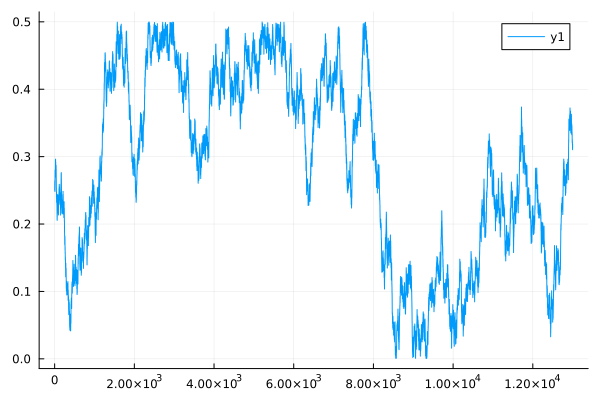

In [ ]:
# Plot the walk for visualization

plot(walk)

In [ ]:
# Create region 1 neural response matrix

neu_resp_matrix = calculate_nonuniform_neural_response_matrix(nonuniform_neurons, walk)

100×13000 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮              ⋱            ⋮                   
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 

In [ ]:
# Add noise to region 1 neural response matrix

neu_resp_matrix = add_normal_random_noise(neu_resp_matrix, 0.075, 0.075)

100×13000 Matrix{Float64}:
 0.0        0.0         0.188924    …  0.0         0.0         0.106868
 0.0        0.0         0.142249       0.0225359   0.0377224   0.0714312
 0.0        0.0702502   0.0755985      0.0219997   0.0         0.0
 0.0        0.00458153  0.0            0.0         0.0738405   0.0680123
 0.067832   0.0531605   0.0616688      0.0873673   0.0         0.0
 0.0        0.0         0.0         …  0.0         0.00528889  0.0
 0.0538687  0.0666507   0.0            0.0495177   0.0458398   0.051184
 0.1473     0.0         0.0517489      0.0         0.0723561   0.0
 0.0        0.00771334  0.051058       0.0         0.0         0.0126546
 0.047223   0.0358252   0.0445822      0.0         0.0134317   0.0716353
 ⋮                                  ⋱                          
 0.0        0.0         0.00429591     0.0         0.0         0.0
 0.0        0.0385645   0.0            0.00885507  0.0         0.0359566
 0.0940615  0.0         0.0            0.00720417  0.0         0.

In [ ]:
# Save response matrix

title = "response_matrix.h5"

if isfile("$title")
    rm("$title")
    println("Removed current $title")
end
h5write("$title", "raster", copy(transpose(neu_resp_matrix)))
println("Replaced $title")


Replaced response_matrix.h5


In [ ]:
# Save walk coordinates

matrix = [x for x in walk]
title = "random_walk.h5"

if isfile("$title")
    rm("$title")
    println("Removed current $title")
end
h5write("$title", "path", matrix)
println("Saved $title")

Saved random_walk.h5


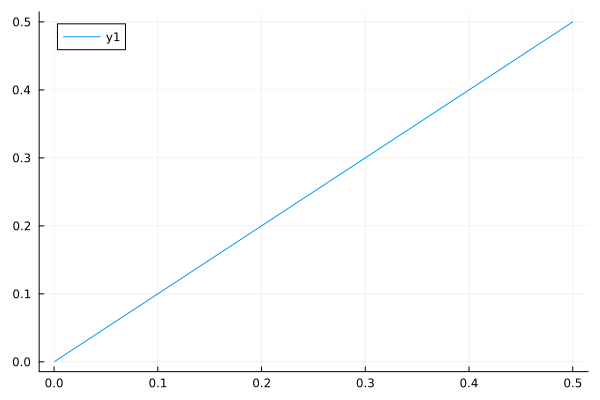

In [ ]:
# Check that saved walk matches produced walk

plot(matrix, walk)